In [3]:
import time 

class TimerError(Exception):
  """A custom exception used to report errors in use of Timer class"""

class Timer:
  def __init__(self):
    self._start_time= None
    self._elapsed_time= None
  
  def start(self):
    """Start a new timer"""
    if self._start_time is not None:
      raise TimerError("Timer is running. Use .stop()")
    self._start_time= time.perf_counter()
  
  def stop(self):
    """Save the elapsed time and re-initialize timer"""
    if self._start_time is None:
      raise TimerError("Timer is not running. Use start()")
    self._elapsed_time= time.perf_counter() - self._start_time
    self._start_time= None

  def elapsed(self):
    """Report elapsed time"""
    if self._elapsed_time is None:
      raise TimerError("Timer has not been run yet. Use start()")
    return self._elapsed_time

  def __str__(self):
    """print() prints elapsed time"""
    return str(self._elapsed_time)


# **Searching in list**

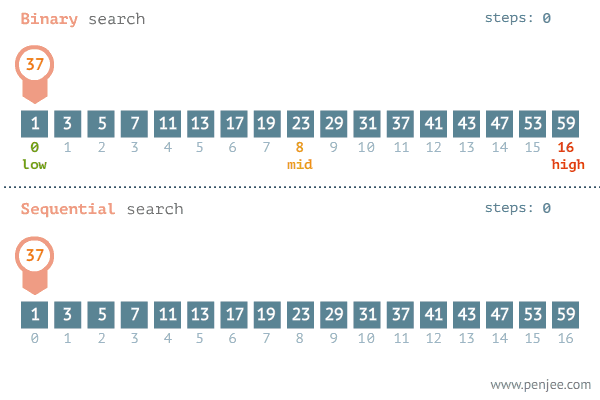

### **Naive Search/ Sequential Search**

***T(n) is O(n)***

In [4]:
def naive_search(l,v):
  for i in l:
    if v==i:
      return True
  return False

## **Binary Search**

**T(n) is O(log n)**

In [14]:
def binary_search(l,v):
  if l==[]:
    return False

  m=len(l)//2

  if v==l[m]:
    return True
  if v<l[m]:
    return binary_search(l[:m],v)
  else:
    return binary_search(l[m+1:],v)

### Performance comparison across 10^4 worst case searches in a list of size 10^5

In [16]:
l= list(range(0,100000,2))
t= Timer()
t.start()
for i in range(3001,13000,2):
  v= naive_search(l,i)
t.stop()
print('Naive Search : ',t)

t.start()
for i in range(3001,13000,2):
  v= binary_search(l,i)
t.stop()
print('Binary Search : ',t)

Naive Search :  10.103197410999996
Binary Search :  0.8380163399999674


# **Sorting a list**

## **Selection Sort**

***T(n) is O(n^2)*** 

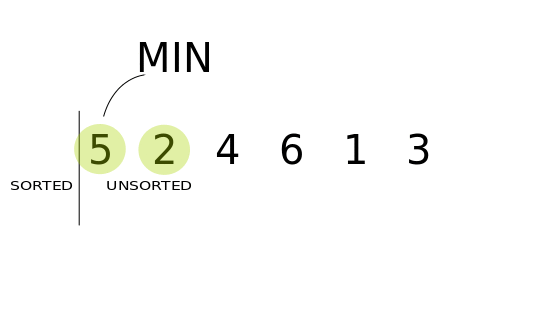

Outer loop iterates *n* times <br>
Inner loop takes *n-1* steps to find the minimum <br>

*T(n) = n + (n-1) + ... + 1* <br>
*T(n) = n(n+1)/2*
<br>
Every input takes this much time


In [17]:
def selection_sort(l):
  n=len(l)
  if n<1:
    return l
  
  for i in range(n):
    # assume l[:i] is sorted
    mpos=i
    # mpos : position of minimum in l[i:]
    for j in range(i+1,n):
      if l[j]<l[mpos]:
        mpos=j
    # l[mpos] : smallest value in l[i:]

    # exchange l[mpos] and l[i]
    l[i],l[mpos]= l[mpos],l[i]
    # now l[:i+1] is sorted
  return l

### Selection Sort performance is more or less the same for all inputs

In [31]:
import random
inputlists={}
inputlists['random']= [random.randrange(100000) for i in range(5000)]
inputlists['ascending']= [i for i in range(5000)]
inputlists['descending']= [i for i in range(4999,-1,-1)]

t=Timer()
for k in inputlists.keys():
  tlist= inputlists[k][:]
  t.start()
  selection_sort(tlist)
  t.stop()
  print(k,t)

random 1.1918150219999006
ascending 1.1879854290000367
descending 1.2371592580000197


## **Insertion Sort Iterative**

***T(n) is O(n^2)*** (worst-case) <br>
***T(n) is O(n)*** (best-case)

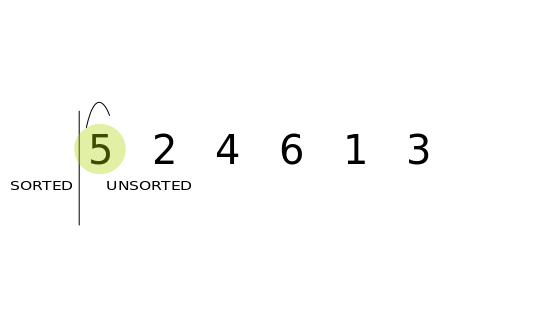

An iterative formulation
- Assume `l[:i]` is sorted
- Insert `l[i]` in `l[:i]`

Updates the existing list ; `l.sort()`

Outer loop iterates *n* times <br>
Inner loop takes *i* steps to insert `l[i]` in `l[:i]` <br>
*T(n) = 0 + 1 + ... + (n-1)* <br>
*T(n) = n(n-1)/2*

In [29]:
def insertion_sort(l):
  n=len(l)
  if n<1:
    return l
  
  for i in range(n):
    # assume l[:i] is sorted
    # move l[i] to correct position in l
    j=i
    while (j>0 and l[j]<l[j-1]):
      l[j],l[j-1]= l[j-1],l[j]
      j-=1
    #now l[:i+1] is sorted
  return l

### Iterative Insertion Sort performance

- On already sorted list, performance is very good
- On reverse sorted list, performance is worse than selection sort

In [30]:
import random
inputlists={}
inputlists['random']= [random.randrange(100000) for i in range(5000)]
inputlists['ascending']= [i for i in range(5000)]
inputlists['descending']= [i for i in range(4999,-1,-1)]

t=Timer()
for k in inputlists.keys():
  tlist= inputlists[k][:]
  t.start()
  insertion_sort(tlist)
  t.stop()
  print(k,t)

random 2.452853134999941
ascending 0.0008864569999786909
descending 4.846618857999829


## **Insertion Sort Recursive**

***T(n) is O(n^2)*** (worst-case) <br>
***T(n) is O(n)*** (best-case)

A recursive formulation
- Inductively sort `l[:i]`
- Insert `l[i]` in `l[:i]`

Creates a new list ; `l2=sorted(l)`

Time taken by insert : *TI(n)* <br>
Time taken by selection_sort : *TS(n)* <br><br>
Calculating *TI(n)*  <br>
*TI(0)=1* <br>
*TI(n)= TI(n-1)+1*  <br>
*TI(n)=n*  
<br>
Calculating *TS(n)*  <br>
*TS(0)=1*  <br>
*TS(n)= TS(n-1)+TI(n-1)*  <br>
*TS(n)= 1+2+ ...+n-1*  <br>



In [36]:
def insert(l,v):
  n=len(l)
  if n==0:
    return [v]

  if v>=l[-1]:
    return l+[v]

  else:
    return insert(l[:-1],v)+l[-1:]

def ins_sort(l):
  n=len(l)
  if n<1:
    return l
  
  l= insert(ins_sort(l[:-1]),l[-1])
  return l

In [37]:
import random
inputlists={}
inputlists['random']= [random.randrange(100000) for i in range(5000)]
inputlists['ascending']= [i for i in range(5000)]
inputlists['descending']= [i for i in range(4999,-1,-1)]

t=Timer()
for k in inputlists.keys():
  tlist= inputlists[k][:]
  t.start()
  ins_sort(tlist)
  t.stop()
  print(k,t)

RecursionError: ignored

### Setup to avoid RecursionError
Set recursion limit to maximum 2^31 - 1 .
(this is the highest value python allows)

In [38]:
import sys
sys.setrecursionlimit(2**31-1)

### Recursive Insertion Sort performance

- Input of 2000(40%) takes more time than 5000 for iterative.
- Performance pattern between unsorted and sorted is similar

In [40]:
import random
inputlists={}
inputlists['random']= [random.randrange(100000) for i in range(2000)]
inputlists['ascending']= [i for i in range(2000)]
inputlists['descending']= [i for i in range(1999,-1,-1)]

t=Timer()
for k in inputlists.keys():
  tlist= inputlists[k][:]
  t.start()
  ins_sort(tlist)
  t.stop()
  print(k,t)

random 10.987138902999959
ascending 0.03603807500030598
descending 19.33244511299972


### **Merge Sort**
**T(n) is O(n log n)**

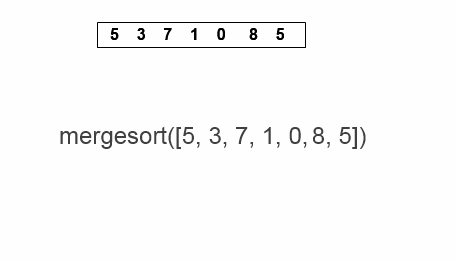

Recursive algorithm <br>
Returns a new list <br>
Uses Divide and Conquer
- Divide the list into 2 halves
- Sort each half
- Merge two sorted halves 

Time taken by merge : *TM(n)* <br>
Time taken by merge_sort : *TS(n)* <br><br>

Calculating *TM(n)*  <br>
Merge *a* of length *m* , *b* of length *n* <br>
*merge* takes time O(m+n) <br>
If *m* nearly equals *n* , *TM(n)* takes time O(n)
<br><br>

Calculating *TS(n)*  <br>
*TS(0)= T(1)= 1*  <br>
*TS(n)= 2TS(n/2)+ n*  <br>
*= 2[ 2TS(n/4)+ n/2] + n = 4 TS(n/4) + 2n* <br>
*= 2^2[ 2TS(n/8)+ n/4] + 2n = 8 TS(n/8) + 3n* <br>
... <br>
*TS(n)= 2^k TS(n/2^k) + kn*  <br>

- When *k= log n , TS(n/2^k) = TS(1) = 1*
- *TS(n)= 2^(log n) TS(1)+ (log n) n = n+ nlog n*
- *TS(n) is O(n log n)*


In [41]:
def merge(a,b):
  m,n= len(a), len(b)
  c=[]
  i,j,k= 0,0,0

  while k<m+n:
    if i==m:
      c.extend(b[j:])
      k += n-j

    elif j==n:
      c.extend(a[i:])
      k+= n-i

    elif a[i]<b[j]:
      c.append(a[i])
      i,k= i+1, k+1
    
    else:
      c.append(b[j])
      j,k= j+1, k+1
  return c

def merge_sort(a):
  n=len(a)
  if n<=1:
    return a

  l= merge_sort(a[:n//2])
  r= merge_sort(a[n//2:])

  v= merge(l,r)
  return v

### Performance on large inputs (10^6)

In [42]:
import random
inputlists={}
inputlists['random']= [random.randrange(100000000) for i in range(1000000)]
inputlists['ascending']= [i for i in range(1000000)]
inputlists['descending']= [i for i in range(999999,-1,-1)]

t=Timer()
for k in inputlists.keys():
  tlist= inputlists[k][:]
  t.start()
  merge_sort(tlist)
  t.stop()
  print(k,t)

random 9.46309931099995
ascending 5.122607113999948
descending 5.180992205000166
